In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [3]:
import os
from tqdm import tqdm

In [4]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:01<00:00, 70.48it/s]


In [5]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

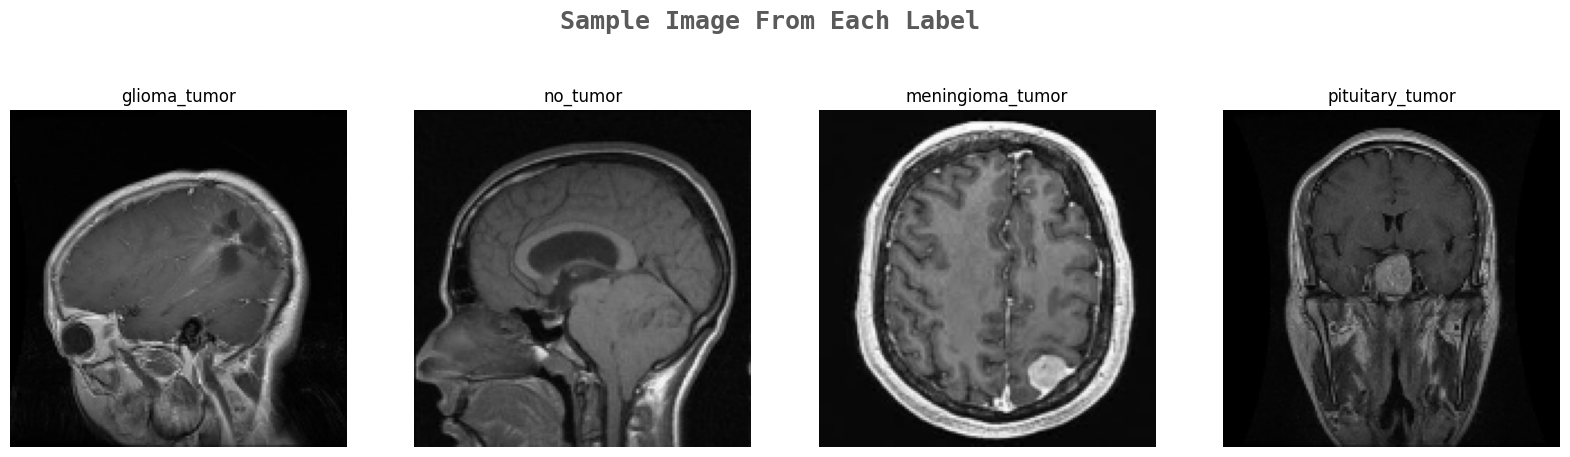

In [6]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [8]:
X_train.shape

(3264, 150, 150, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(image_size,image_size,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights= None,#'imagenet',
    input_tensor=None,
    pooling=None,
    classes=4,#1000,
    classifier_activation='softmax',
#     **kwargs
)

In [12]:
model.summary()

Model: "mobilenet_1.00_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32) 

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32)

Epoch 1/12


2024-01-16 11:37:54.501018: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmobilenet_1.00_150/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 22s 78ms/step - loss: 1.1987 - accuracy: 0.4816 - val_loss: 1.3773 - val_accuracy: 0.2891
Epoch 2/12
83/83 [==============================] - 5s 64ms/step - loss: 0.9198 - accuracy: 0.6201 - val_loss: 1.5311 - val_accuracy: 0.2789
Epoch 3/12
83/83 [==============================] - 5s 64ms/step - loss: 0.6883 - accuracy: 0.7295 - val_loss: 1.8897 - val_accuracy: 0.2789
Epoch 4/12
83/83 [==============================] - 5s 64ms/step - loss: 0.5426 - accuracy: 0.7836 - val_loss: 2.4514 - val_accuracy: 0.2789
Epoch 5/12
83/83 [==============================] - 5s 64ms/step - loss: 0.5161 - accuracy: 0.7949 - val_loss: 2.3190 - val_accuracy: 0.2789
Epoch 6/12
83/83 [==============================] - 5s 65ms/step - loss: 0.3783 - accuracy: 0.8596 - val_loss: 2.6233 - val_accuracy: 0.2789
Epoch 7/12
83/83 [==============================] - 5s 65ms/step - loss: 0.3038 - accuracy: 0.8869 - val_loss: 2.8906 - val_accuracy: 0.2993
Epoch 8/12
83/83 [=====

In [15]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 1s 37ms/step


In [16]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.90      0.40      0.55        93
           1       1.00      0.53      0.69        51
           2       0.63      0.97      0.76        96
           3       0.77      0.98      0.86        87

    accuracy                           0.74       327
   macro avg       0.82      0.72      0.72       327
weighted avg       0.80      0.74      0.72       327



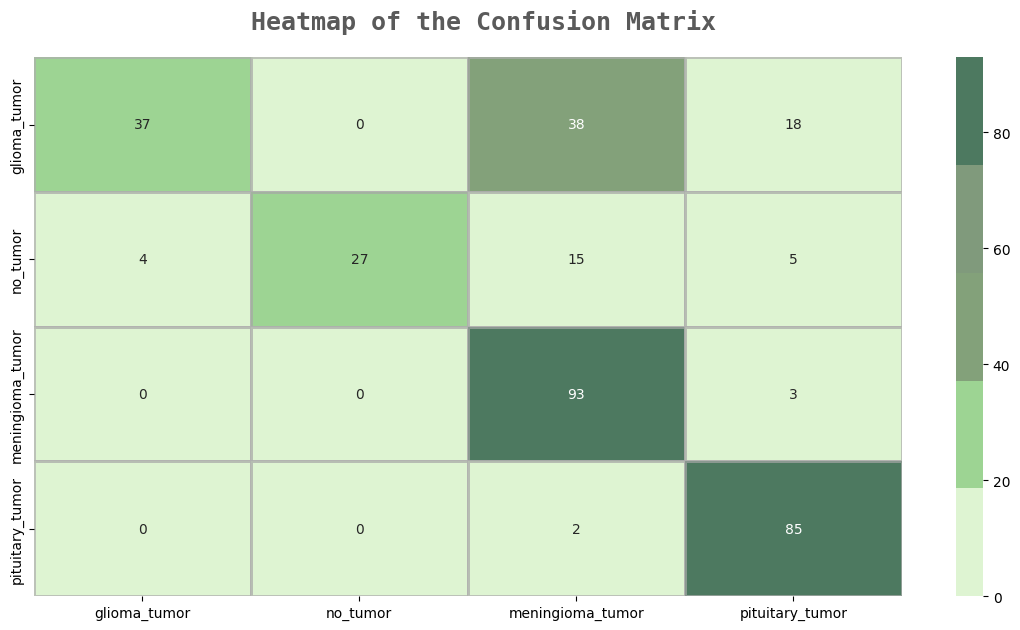

In [17]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test_new,pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_new,pred, average='weighted')
recall = recall_score(y_test_new,pred, average='weighted')
f1 = f1_score(y_test_new,pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7401
Precision: 0.8008
Recall: 0.7401
F1 Score: 0.7173


In [19]:
import joblib
model_filename = 'bb.joblib'
joblib.dump(model, model_filename)

['bb.joblib']

In [20]:
import sys
import joblib
# from sklearn.linear_model import LogisticRegression  # Replace with your model

# Create and train the model (replace this with your actual model and training data)
# model = LogisticRegression()
# model.fit(X_train, y_train)

# Save the model to a file using joblib
model_filename = 'bb.joblib'
joblib.dump(model, model_filename)

# Get the size of the model file
model_size = sys.getsizeof(model_filename) / (1024 * 1024)  # Convert to megabytes
print(f"Model size: {model_size:.2f} MB")


Model size: 0.00 MB
